In [38]:
%pip install tensorflow
import tensorflow as tf
# Import the numpy package (math, arrays, etc.)
import numpy as np
# Matplotlib for graphing
import matplotlib.pyplot as plt
# Math functions
import math


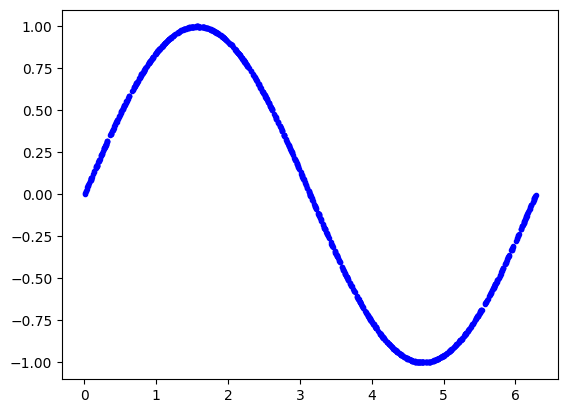

In [39]:
# Generate Sine Wave
SAMPLES = 1000

# Set a "seed" for the random number generator each time the code is run
SEED = 1337
# Set the random seed for numpy and tensorflow
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate random values for x in a complete cycle of a sine wave
x_values = np.random.uniform(low=0, high=2*np.pi, size=SAMPLES)

# Shuffle the values to guarantee they are in random order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot data
plt.plot(x_values, y_values, 'b.')
plt.show()

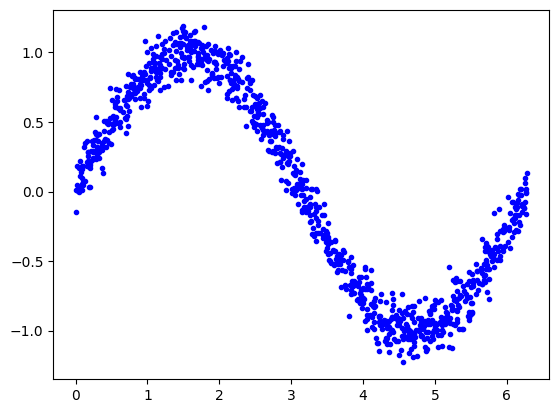

In [40]:
# Add some noise to the data for each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot data
plt.plot(x_values, y_values, 'b.')
plt.show()

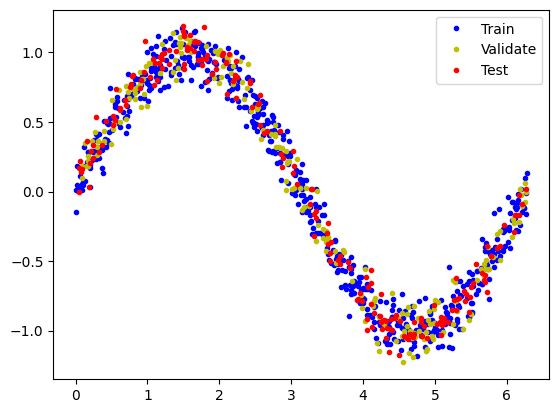

In [41]:
# 60% of the data will be used for training and 20% for testing and 20% for validation
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Split the data into training, validation, and test sets
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Verify the size of the partitions
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()


In [42]:
# Use Keras to build a neural network
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

# Add the first dense layer with 16 units and ReLU activation that receives a single value as input and pass it on 16 neurons to try to find the non-linear relationship in the data
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since the output is a single value
model_1.add(layers.Dense(1))

# Compile the model
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print summary of the model architecture
model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Train the model
history_1 = model_1.fit(
    x_train, 
    y_train,
    epochs=1000,
    batch_size=16,
    validation_data=(x_validate, y_validate)
)

Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.4644 - mae: 0.6054 - val_loss: 0.4082 - val_mae: 0.5556
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3669 - mae: 0.5259 - val_loss: 0.3556 - val_mae: 0.5142
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3213 - mae: 0.4923 - val_loss: 0.3127 - val_mae: 0.4801
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2837 - mae: 0.4631 - val_loss: 0.2776 - val_mae: 0.4517
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2531 - mae: 0.4389 - val_loss: 0.2496 - val_mae: 0.4292
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2289 - mae: 0.4192 - val_loss: 0.2278 - val_mae: 0.4107
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2104 - mae: 0.4025 - val_loss: 0.2115 - val_mae: 0.3969
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1967 - mae: 0.3894 - val_loss: 0.1995 - val_mae: 0.3855
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - l

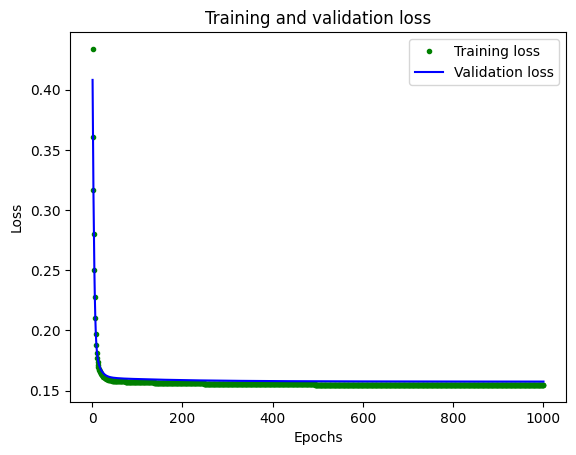

In [44]:
# Plot loss and val_loss
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

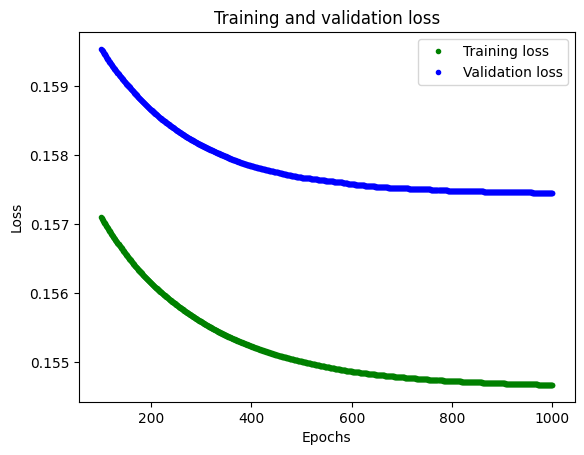

In [45]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


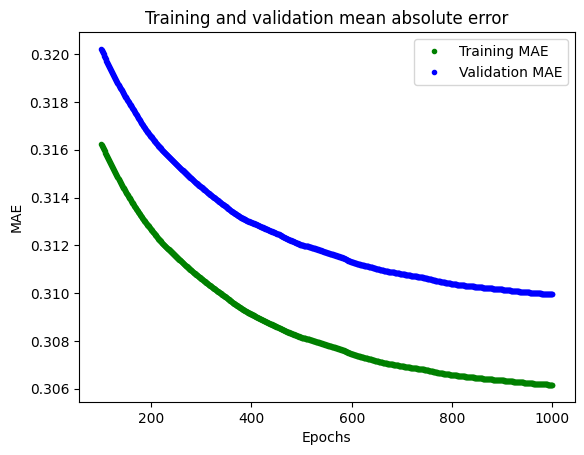

In [46]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


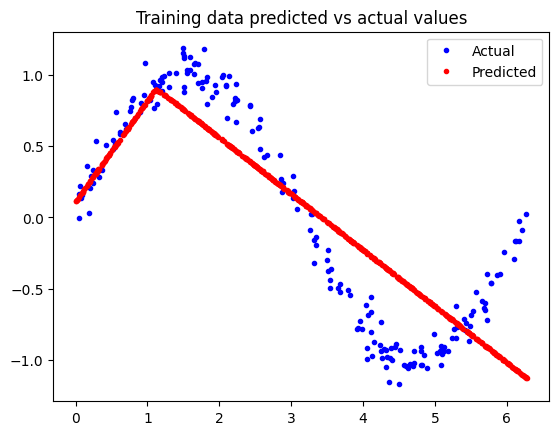

In [47]:
# Use the model to make predictions from the training data
predictions = model_1.predict(x_train)

# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()



In [49]:
# Create a model to help the model learn non-linear relationships
model_2 = tf.keras.Sequential()
# Add the first dense layer with 16 units and ReLU activation that receives a single value as input and pass it on 16 neurons to try to find the non-linear relationship in the data
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# LAst model stopped improving at epoch 600
history_2 = model_2.fit(
    x_train, 
    y_train, 
    epochs=600, 
    batch_size=16,
 validation_data=(x_validate, y_validate))


Epoch 1/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3968 - mae: 0.5504 - val_loss: 0.3633 - val_mae: 0.5199
Epoch 2/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3242 - mae: 0.4943 - val_loss: 0.2983 - val_mae: 0.4676
Epoch 3/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2665 - mae: 0.4492 - val_loss: 0.2450 - val_mae: 0.4253
Epoch 4/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2204 - mae: 0.4118 - val_loss: 0.2032 - val_mae: 0.3893
Epoch 5/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1854 - mae: 0.3786 - val_loss: 0.1706 - val_mae: 0.3560
Epoch 6/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1564 - mae: 0.3471 - val_loss: 0.1510 - val_mae: 0.3330
Epoch 7/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1369 - mae: 0.3212 - val_loss: 0.1318 - val_mae: 0.3084
Epoch 8/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1205 - mae: 0.2966 - val_loss: 0.1183 - val_mae: 0.2876
Epoch 9/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.10

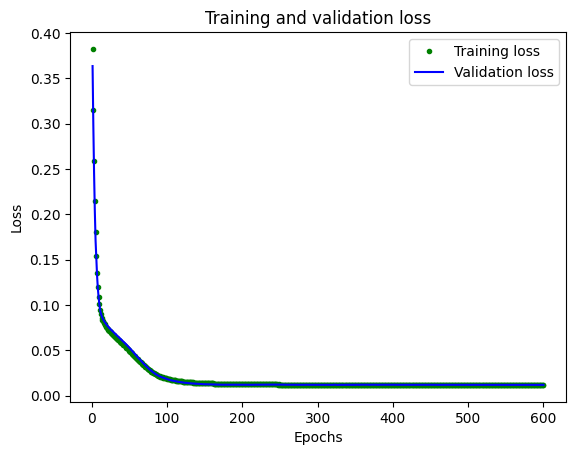

In [51]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


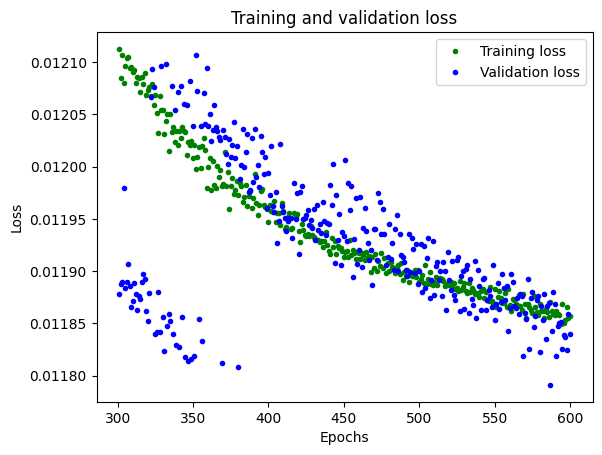

In [53]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 300
plt.clf()
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

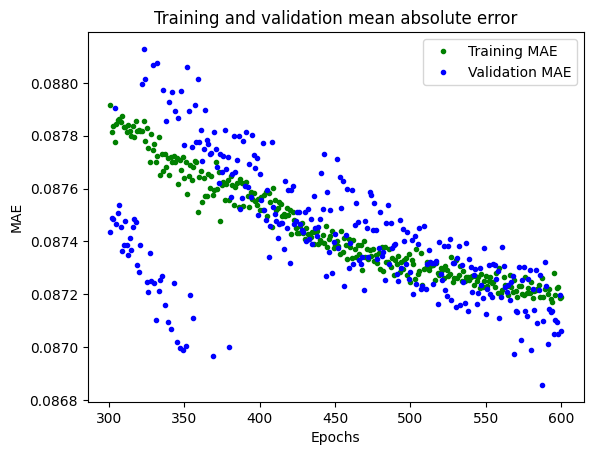

In [54]:
plt.clf()
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0098 - mae: 0.0770 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


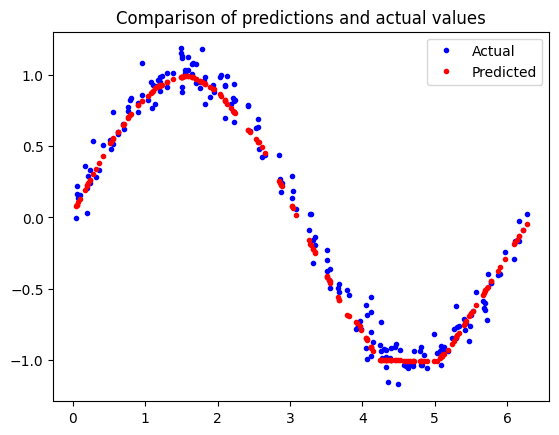

In [56]:
# Calculate and print the loss of test dataset
loss = model_2.evaluate(x_test, y_test)

# Make predictions based on test dataset
predictions = model_2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

